In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
# Load the dataset
from google.colab import files
uploaded = files.upload()


Saving glass.xlsx to glass (1).xlsx


In [9]:
df = pd.read_excel('glass.xlsx', sheet_name='glass')

In [10]:
# Step 1: Exploratory data analysis(EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
# Missing values
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [12]:
# Summary statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


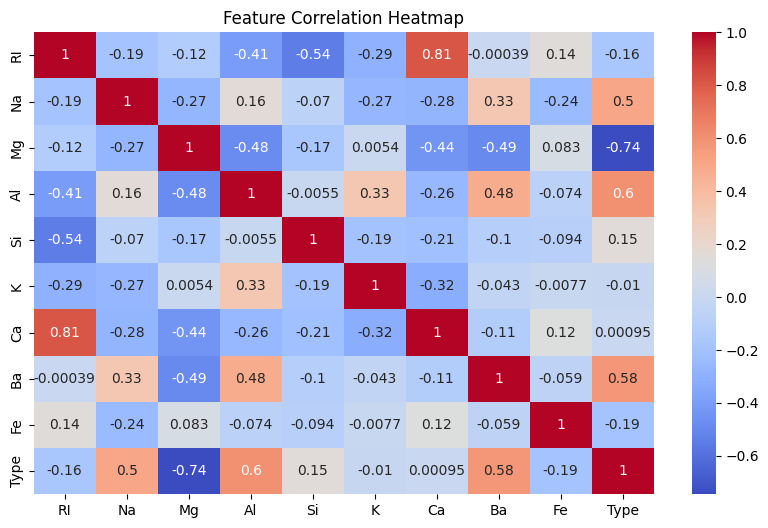

In [16]:
# Step 2: Data visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

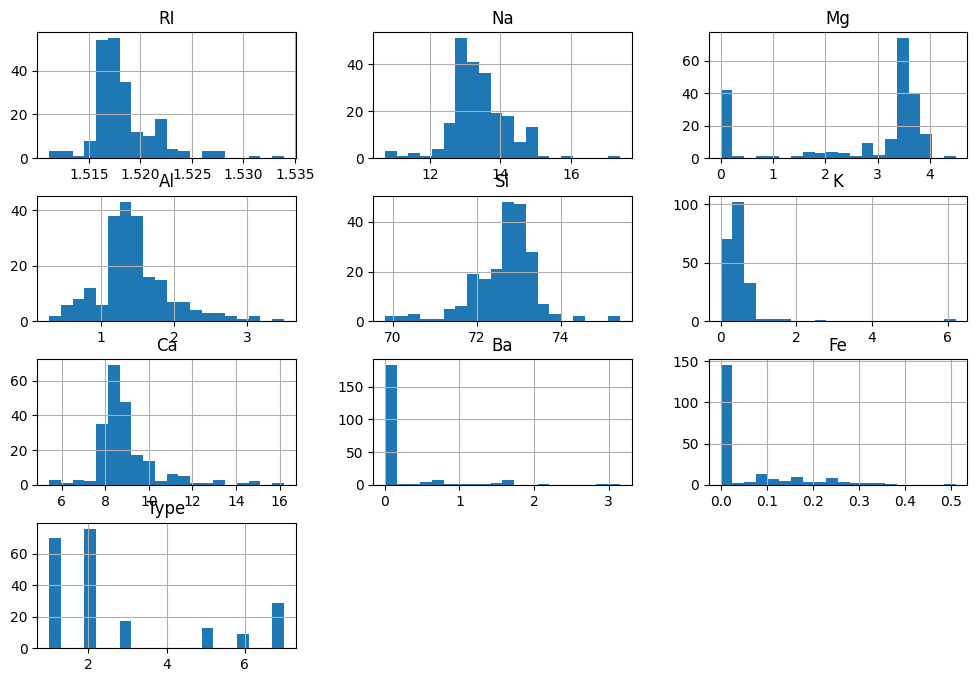

In [18]:
# Histograms
df.hist(figsize=(12,8), bins=20)
plt.show()

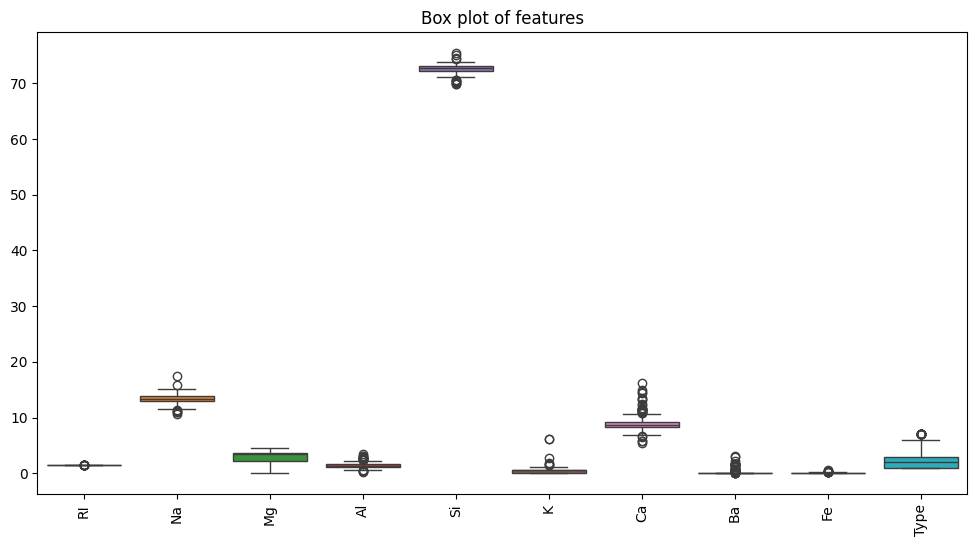

In [23]:
# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box plot of features")
plt.show()

In [24]:
# Step 3: Data preprocessing(splitting features and target)
x = df.iloc[:, :-1] # Assuminf last column is target
y = df.iloc[:, -1]

In [31]:
# Feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [33]:
# Step 4: Random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [34]:
# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
Accuracy: 0.8372093023255814


In [36]:
# Bagging method
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(x_train, y_train)
bagging_pred = bagging_model.predict(x_test)
print("Bagging Accuracy:", accuracy_score(y_test, bagging_pred))

Bagging Accuracy: 0.8372093023255814


In [37]:
# Boosting method(AdaBoost)
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(x_train, y_train)
boosting_pred = boosting_model.predict(x_test)
print("Boosting Accuracy:", accuracy_score(y_test, boosting_pred))

Boosting Accuracy: 0.5348837209302325


In [ ]:
# Additional Notes:
# 1. Explain Bagging and Boosting methods. How is it different from each other.
# Bagging trains models independently in parallel on different subsets of data, while Boosting trains models sequentially, where each new model focuses on correcting the errors made by the previous model; essentially, Bagging aims to reduce variance by averaging predictions, while Boosting focuses on reducing bias by iteratively improving upon previous errors.


In [ ]:
# # 2. Explain how to handle imbalance in the data
# 1. Use resampling (SMOTE/undersampling) when dataset size is a concern.
# 2. Use class weighting when training with RandomForestClassifier for an easier approach.
# 3. Evaluate using the right metrics to ensure a fair assessment of the model.
